In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from datetime import datetime, timedelta

In [79]:
start = datetime.now() - timedelta(days=5*365)
end = datetime.now()
df = yf.download('TSLA', start, end)

[*********************100%%**********************]  1 of 1 completed


In [80]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-16,23.012667,23.713333,23.007999,23.620667,23.620667,108093000
2018-11-19,23.756001,24.450001,23.525333,23.564667,23.564667,145633500
2018-11-20,22.783333,23.320000,22.236668,23.166000,23.166000,120070500
2018-11-21,23.466667,23.540001,22.493334,22.546000,22.546000,70302000
2018-11-23,22.290001,22.500000,21.703333,21.722000,21.722000,63039000
...,...,...,...,...,...,...
2023-11-08,223.149994,224.149994,217.639999,222.110001,222.110001,106584800
2023-11-09,219.750000,220.800003,206.679993,209.979996,209.979996,142110500
2023-11-10,210.029999,215.380005,205.690002,214.649994,214.649994,130994000


In [81]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-16,23.012667,23.713333,23.007999,23.620667,23.620667,108093000
1,2018-11-19,23.756001,24.450001,23.525333,23.564667,23.564667,145633500
2,2018-11-20,22.783333,23.320000,22.236668,23.166000,23.166000,120070500
3,2018-11-21,23.466667,23.540001,22.493334,22.546000,22.546000,70302000
4,2018-11-23,22.290001,22.500000,21.703333,21.722000,21.722000,63039000


In [82]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,23.012667,23.713333,23.007999,23.620667,108093000
1,23.756001,24.450001,23.525333,23.564667,145633500
2,22.783333,23.320000,22.236668,23.166000,120070500
3,23.466667,23.540001,22.493334,22.546000,70302000
4,22.290001,22.500000,21.703333,21.722000,63039000


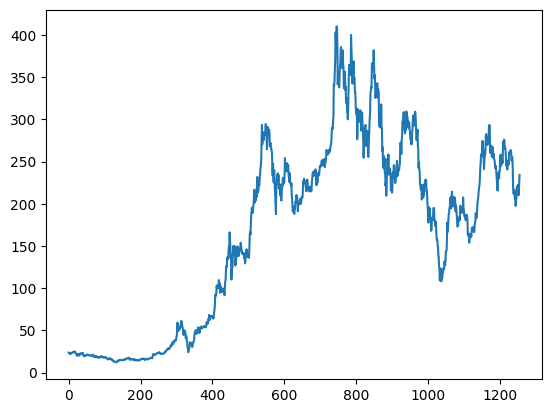

In [83]:
plt.plot(df.Close)

In [84]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1251    250.246800
1252    249.602099
1253    249.153999
1254    248.745000
1255    248.519300
Name: Close, Length: 1256, dtype: float64

In [85]:
ma200 = df.Close.rolling(200).mean()

In [86]:
 ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1251    220.27325
1252    220.60100
1253    220.87290
1254    221.10195
1255    221.43880
Name: Close, Length: 1256, dtype: float64

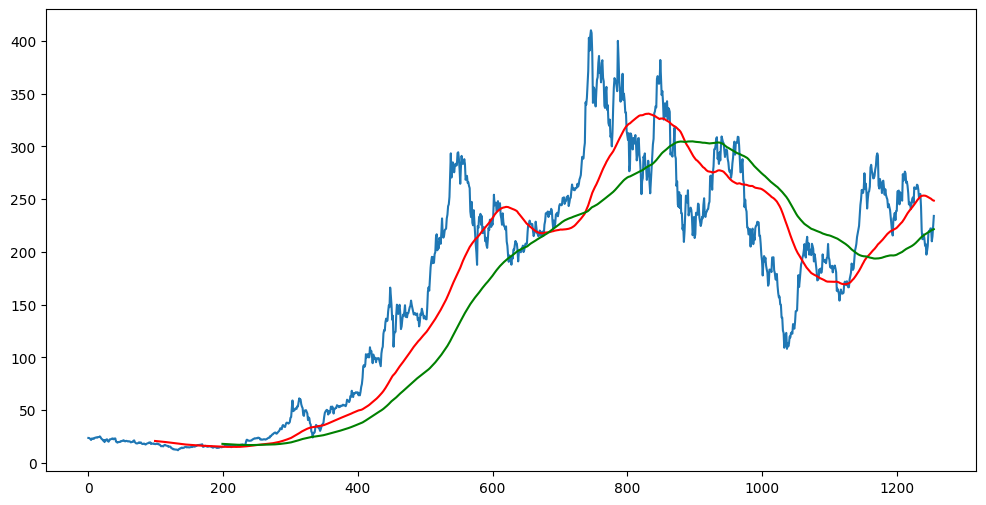

In [87]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [88]:
df.shape

(1256, 5)

In [89]:
#Spliiting data into trainiing and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70): len(df)])

In [90]:
print(data_training.shape)
print(data_testing.shape)

(879, 1)
(377, 1)


In [91]:
#scaling down the data using standardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))


In [92]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02936733],
       [0.02922664],
       [0.02822507],
       [0.02666743],
       [0.02459728],
       [0.02797551],
       [0.02762713],
       [0.02828871],
       [0.02716654],
       [0.02872585],
       [0.03006743],
       [0.03027009],
       [0.03083285],
       [0.02998034],
       [0.0311829 ],
       [0.03145256],
       [0.03142576],
       [0.03313246],
       [0.0312767 ],
       [0.02838083],
       [0.02647314],
       [0.02579314],
       [0.02284703],
       [0.0235823 ],
       [0.01949895],
       [0.02464082],
       [0.02297264],
       [0.02594388],
       [0.02576467],
       [0.02196604],
       [0.02033136],
       [0.02323392],
       [0.02612644],
       [0.02619176],
       [0.02672437],
       [0.02780299],
       [0.02818654],
       [0.02603265],
       [0.02771255],
       [0.02798388],
       [0.02819492],
       [0.02064959],
       [0.02009018],
       [0.01819254],
       [0.01884909],
       [0.0197753 ],
       [0.01966476],
       [0.019

In [93]:
x_train = []
y_train = []

In [94]:
for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i - 100:i])
  y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [95]:
#ML model
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [96]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add (Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add (Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add (Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add (Dropout(0.5))

model.add(Dense(units = 1))

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [98]:
#using an earlystopping as a callback funtion fora faster compilation
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=3)

In [99]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50, callbacks=[early_stopping])

Epoch 1/50
25/25 [==============================] - 5s 128ms/step - loss: 0.0882
Epoch 2/50
25/25 [==============================] - 3s 119ms/step - loss: 0.0231
Epoch 3/50
25/25 [==============================] - 3s 114ms/step - loss: 0.0116
Epoch 4/50
25/25 [==============================] - 3s 113ms/step - loss: 0.0106
Epoch 5/50
25/25 [==============================] - 3s 121ms/step - loss: 0.0096
Epoch 6/50
25/25 [==============================] - 3s 121ms/step - loss: 0.0100
Epoch 7/50
25/25 [==============================] - 3s 116ms/step - loss: 0.0098
Epoch 8/50
25/25 [==============================] - 3s 127ms/step - loss: 0.0106


In [100]:
model.save("keras_model.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [101]:
past_100_days = data_training.tail(100)

In [102]:
final_df= pd.concat([past_100_days, data_testing], ignore_index=True)

In [103]:
final_df.head()

,Close
0,336.290009
1,355.666656
2,364.646667
3,362.823334
4,362.063324


In [104]:
input_data = scaler.fit_transform(final_df)

In [105]:
input_data.shape

(477, 1)

In [106]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i - 100: i])
  y_test.append(input_data[i, 0])

In [107]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [108]:
print(x_test.shape)
print(y_test.shape)

(377, 100, 1)
(377,)


In [109]:
y_predict = model.predict(x_test)
y_predict.shape

12/12 [==============================] - 1s 43ms/step


(377, 1)

In [110]:
scaler.scale_

array([0.00342669])

In [111]:
scale_factor = 1/(0.00342669)

In [112]:
y_predict = y_predict * scale_factor
y_test = y_test * scale_factor

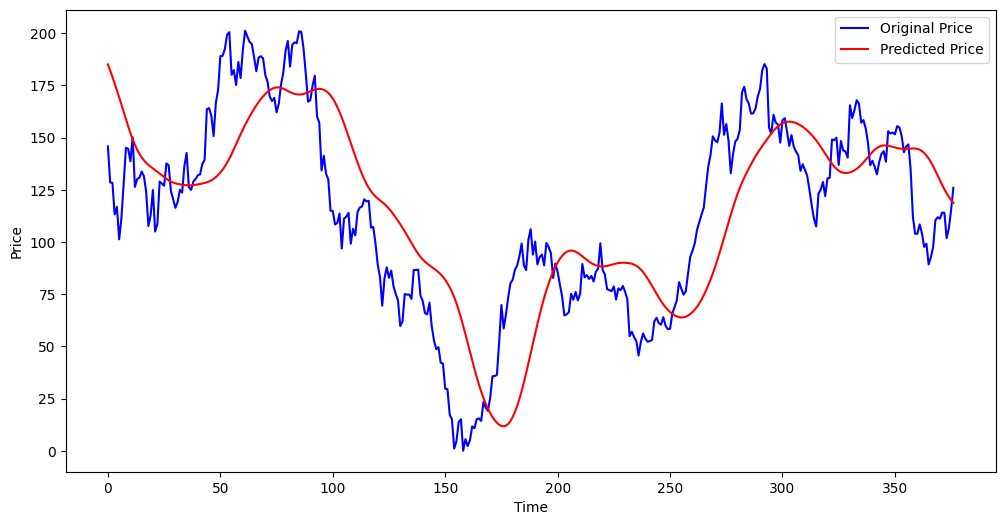

In [113]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [117]:
y_test = np.reshape(y_test, (-1, 1))

In [121]:
print(y_test.shape, y_predict.shape)

(377, 1) (377, 1)


In [122]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)

In [123]:
print(accuracy)

0.5581950226616583
